In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
df_equal_principal = pd.read_excel('等额本金.xlsx')
df_equal_interest = pd.read_excel('等额本息.xlsx')
df_equal_principal

,城市,楼盘名称,贷款金额（70%，万元）,贷款类型,贷款期限（月）,公积金利率（%）,首付（万元）,首月月供（元，首月后每月递减73元）,还款总额（万元）,总利息（万元）,本息总计（万元）
0,上海,保利光合上城,489,公积金贷款,360,3.25,211,26827,489,128,617


In [2]:
df_equal_interest

,城市,楼盘名称,贷款金额（70%，万元）,贷款类型,贷款期限（月）,公积金利率（%）,首付（万元）,月供（元）,还款总额（万元）,总利息（万元）,本息总计（万元）
0,上海,保利光合上城,489,公积金贷款,360,3.25,211,21282,489,277,766


In [4]:
P = df_equal_principal['贷款金额（70%，万元）'][0] * 10000 #贷款总金
annual_rate = df_equal_principal['公积金利率（%）'][0] #贷款年利率
n_months = df_equal_principal['贷款期限（月）'][0] #贷款总月数
m_rate = annual_rate / 12 / 100 #贷款月利率

# 计算等额本金的每月本金和利息还款金额
principal_payment_equal_principal = []
interest_payment_equal_principal = []

for i in range(1, n_months + 1):
    principal = P / n_months
    interest = (P - (i - 1) * P / n_months) * m_rate
    principal_payment_equal_principal.append(principal)
    interest_payment_equal_principal.append(interest)

# 计算等额本息的每月本金和利息还款金额
principal_payment_equal_installment = []
interest_payment_equal_installment = []
P_copy = P
month_payment = (P * m_rate * (1 + m_rate) ** n_months) / ((1 + m_rate) ** n_months - 1)

for i in range(n_months):
    interest = P_copy * m_rate
    principal = month_payment - interest
    principal_payment_equal_installment.append(principal)
    interest_payment_equal_installment.append(interest)
    P_copy -= principal

# 打印结果
print("等额本金的每月本金还款金额列表：", principal_payment_equal_principal)
print("等额本金的每月利息还款金额列表：", interest_payment_equal_principal)
print("等额本息的每月本金还款金额列表：", principal_payment_equal_installment)
print("等额本息的每月利息还款金额列表：", interest_payment_equal_installment)

total_interest_equal_principal = sum(interest_payment_equal_principal)
print("等额本金的每月利息还款金额总和：", total_interest_equal_principal)
total_principal_equal_principal = sum(principal_payment_equal_principal)
print("等额本金的每月本金还款金额总和：", total_principal_equal_principal)
monthly_decrease = P / n_months * m_rate
print("等额本金的每月月供递减额：", monthly_decrease)
total_principal = total_interest_equal_principal + total_principal_equal_principal
print("等额本金的还款总额：", total_principal)

total_interest_equal_installment = sum(interest_payment_equal_installment)
print("等额本息的每月利息还款金额总和：", total_interest_equal_installment)
total_principal_equal_installment = sum(principal_payment_equal_installment)
print("等额本息的每月利息还款金额总和：", total_principal_equal_installment)
total_interest = total_interest_equal_installment + total_principal_equal_installment
print("等额本息的还款总额：", total_interest)

等额本金的每月本金还款金额列表： [13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13583.333333333334, 13

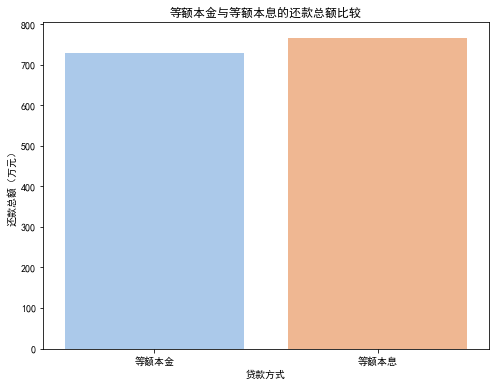

In [5]:
# 比较还款总额
total_payment = pd.DataFrame({
    '贷款方式': ['等额本金', '等额本息'],
    '还款总额': [total_principal/10000, total_interest/10000]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='贷款方式', y='还款总额', data=total_payment, palette="pastel")
plt.title('等额本金与等额本息的还款总额比较')
plt.xlabel('贷款方式')
plt.ylabel('还款总额（万元）')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

In [6]:
# 计算等额本金每月还款总额
m_total_principal_payment = [i + j for i, j in zip(principal_payment_equal_principal, interest_payment_equal_principal)]

print("等额本金每月总还款金额列表：", m_total_principal_payment)

等额本金每月总还款金额列表： [26827.083333333332, 26790.29513888889, 26753.506944444445, 26716.71875, 26679.930555555555, 26643.14236111111, 26606.354166666664, 26569.565972222223, 26532.777777777774, 26495.989583333332, 26459.20138888889, 26422.413194444445, 26385.625, 26348.836805555555, 26312.04861111111, 26275.260416666664, 26238.472222222223, 26201.684027777774, 26164.895833333332, 26128.10763888889, 26091.319444444445, 26054.53125, 26017.743055555555, 25980.95486111111, 25944.166666666664, 25907.378472222223, 25870.590277777774, 25833.802083333332, 25797.01388888889, 25760.225694444445, 25723.4375, 25686.649305555555, 25649.86111111111, 25613.072916666664, 25576.284722222223, 25539.496527777774, 25502.708333333332, 25465.92013888889, 25429.131944444445, 25392.34375, 25355.555555555555, 25318.76736111111, 25281.979166666664, 25245.190972222223, 25208.402777777774, 25171.614583333332, 25134.82638888889, 25098.038194444445, 25061.25, 25024.461805555555, 24987.67361111111, 24950.885416666664, 2491

In [8]:
m_total_principal_interest = m_total_principal_interest = round(principal_payment_equal_installment[0] + interest_payment_equal_installment[0])

data = {'月份': range(1, n_months + 1),
        '等额本息': m_total_principal_interest,
        '等额本金': m_total_principal_payment}
df = pd.DataFrame(data)
df

,月份,等额本息,等额本金
0,1,21282.0,26827.083333
1,2,21282.0,26790.295139
2,3,21282.0,26753.506944
3,4,21282.0,26716.718750
4,5,21282.0,26679.930556
...,...,...,...
355,356,21282.0,13767.274306
356,357,21282.0,13730.486111
357,358,21282.0,13693.697917
358,359,21282.0,13656.909722


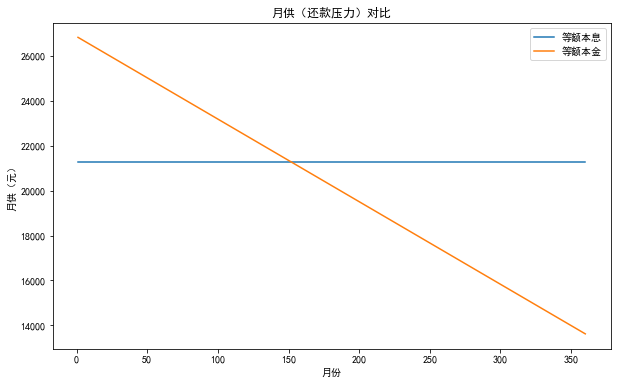

In [9]:
# 绘制月供对比折线图
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='月份', y='等额本息', label='等额本息')
sns.lineplot(data=df, x='月份', y='等额本金', label='等额本金')
plt.title('月供（还款压力）对比')
plt.xlabel('月份')
plt.ylabel('月供（元）')
plt.show()

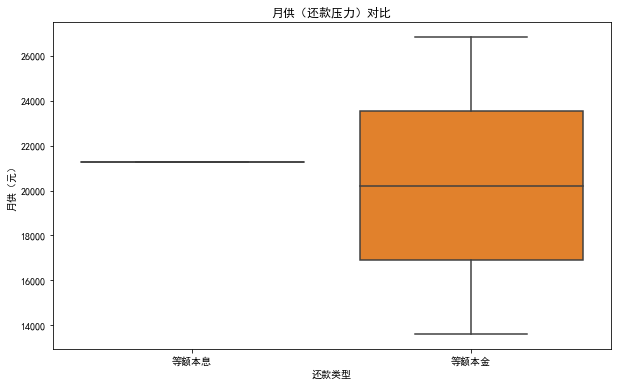

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['等额本息', '等额本金']])
plt.title('月供（还款压力）对比')
plt.xlabel('还款类型')
plt.ylabel('月供（元）')
plt.show()

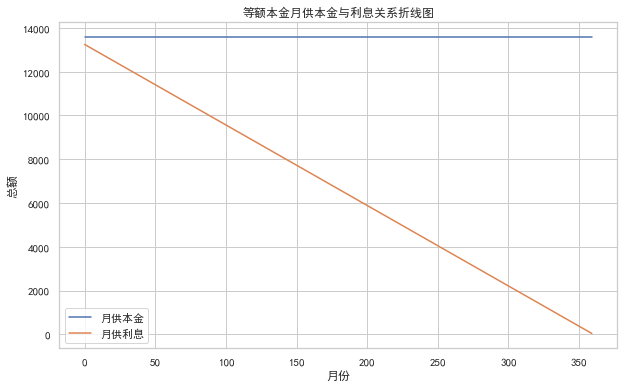

In [11]:
#探究等额本金月供本金与利息关系
data = pd.DataFrame({'月份': range(1, n_months + 1),
                     '月供本金': principal_payment_equal_principal,
                     '月供利息': interest_payment_equal_principal})

# 使用seaborn绘制折线图
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=data[['月供本金', '月供利息']], dashes=False)

# 设置图表标题和轴标签
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title('等额本金月供本金与利息关系折线图')
plt.xlabel('月份')
plt.ylabel('总额')

# 显示图表
plt.show()

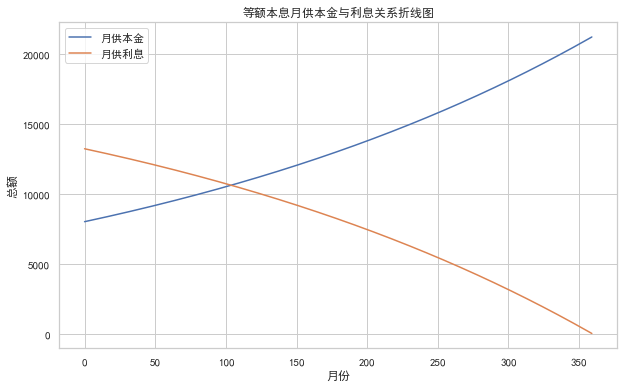

In [12]:
#探究等额本息月供本金与利息关系
data = pd.DataFrame({'月份': range(1, n_months + 1),
                     '月供本金': principal_payment_equal_installment,
                     '月供利息': interest_payment_equal_installment})

# 使用seaborn绘制折线图
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=data[['月供本金', '月供利息']], dashes=False)

# 设置图表标题和轴标签
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title('等额本息月供本金与利息关系折线图')
plt.xlabel('月份')
plt.ylabel('总额')

# 显示图表
plt.show()